In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
plt.rc('figure', figsize=(20,20))
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import StackingRegressor

Aim: To build a model using publically available data for key supply –demand factors that could influence U.S. Home Prices. Use that factors to explain how these factors home prices over last 20 years.

1.	Observation date : 
These are the dates of observations (Annual observation from the year 2000 to year 2020) 

2.	Unemployment RATE : 
This features gives the unemployment rate of USA from year 2000 to 2020

3.	GDP:
This feature gives the Gross Domestic Product value of USA from year 2000 to 2020



4.	PERMIT:
This features gives the values of total housing permits passed in USA over the year 2000 to 2020(UNIT: Thousands of unit)


5.	POPTHM :
This feature gives the information about the population growth of USA (UNIT: Thousands)


6.	Recession:
This features represent weather the year was going through Recession or not
(0 -> represents no Recession, 1-> represents Recession)


7.	House Tax:
This features gives the values of taxes the owner had to pay during the observation date
(UNIT: Thousands)


8.	TTLCONS
This features gives the values of total construction spending in USA during the observation date (Unit: Millions of Dollars)


9	Life Expectancy :
This features gives the value of life Expectancy at birth total for United States 
(Unit: Years)



9.	MORTGAGE_RATE_US:
This features gives the values of mortgage average rate in United States 
(Unit: Percent)

 

10.	CPI:
The CPI stands for Consumer Price Index it measures change over time in the prices paid by consumers for a representative basket of goods and services.

11.	Home Price Index:
This feature basically serves the purpose of target variable in the dataset




## EDA

#### Reading the data

In [2]:
data=pd.read_csv(r"C:\Users\CB723RT\Downloads\data.csv")

In [3]:
data.head()

,DATE,UNRATE,GDP in Billion $,Number of Permits,Population in Thousands,Recession,House Tax Unit $,Total Contruction Cost in Million $,LIFE EXPECTANCY in YEARS,MORTGAGE in Percent,CPI,Inflation in Percent,House Price Index
0,1/1/2003,5.991667,11456.44950,1888.416667,290626.2500,0,611,74291.50000,77.036585,5.826981,184.800000,2.270095,133.731333
1,1/1/2004,5.541667,12217.19575,2057.583333,293262.3333,0,595,82613.08333,77.487805,5.839231,189.541667,2.677237,150.440250
2,1/1/2005,5.083333,13039.19700,2160.083333,295992.9167,0,667,93067.58333,77.487805,5.866731,195.716667,3.392747,171.737000
3,1/1/2006,4.608333,13815.58300,1843.666667,298817.6667,0,649,96773.50000,77.687805,6.413269,203.158333,3.225944,183.447500
4,1/1/2007,4.616667,14474.22700,1391.500000,301696.1667,0,582,95662.75000,77.987805,6.337308,209.582583,2.852672,179.918917


In [4]:
data.shape

(20, 13)

In [5]:
data.isnull().sum()

DATE                                   0
UNRATE                                 0
GDP in Billion $                       0
Number of Permits                      0
Population in Thousands                0
Recession                              0
House Tax Unit $                       0
Total Contruction Cost in Million $    0
LIFE EXPECTANCY in YEARS               1
MORTGAGE in Percent                    0
CPI                                    0
Inflation in Percent                   0
House Price Index                      0
dtype: int64

Life Expectancy has 1 missing value

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DATE                                 20 non-null     object 
 1   UNRATE                               20 non-null     float64
 2   GDP in Billion $                     20 non-null     float64
 3   Number of Permits                    20 non-null     float64
 4   Population in Thousands              20 non-null     float64
 5   Recession                            20 non-null     int64  
 6   House Tax Unit $                     20 non-null     int64  
 7   Total Contruction Cost in Million $  20 non-null     float64
 8   LIFE EXPECTANCY in YEARS             19 non-null     float64
 9   MORTGAGE in Percent                  20 non-null     float64
 10  CPI                                  20 non-null     float64
 11  Inflation in Percent              

In [7]:
data.describe()

,UNRATE,GDP in Billion $,Number of Permits,Population in Thousands,Recession,House Tax Unit $,Total Contruction Cost in Million $,LIFE EXPECTANCY in YEARS,MORTGAGE in Percent,CPI,Inflation in Percent,House Price Index
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,19.000000,20.000000,20.000000,20.000000,20.000000
mean,6.012083,17183.895637,1309.350000,314817.991670,0.150000,1713.450000,95989.379167,78.112067,4.683755,232.286837,2.477744,180.658671
std,1.893961,3792.298608,478.827900,14027.043646,0.366348,1139.593209,23686.180924,0.741440,1.082717,31.428653,1.765183,41.948315
min,3.641667,11456.449500,582.000000,290626.250000,0.000000,582.000000,65936.500000,76.329268,2.957692,184.800000,-0.355546,133.731333
25%,4.614583,14477.106813,964.958333,303831.354150,0.000000,646.250000,76156.645830,77.587805,3.914471,214.585771,1.582875,149.966458
50%,5.454167,16548.582875,1307.250000,315912.208350,0.000000,1406.500000,93705.333330,78.539024,4.496250,225.031792,2.200102,171.959375
75%,7.537500,19741.266750,1684.541667,327343.375025,0.000000,2704.500000,107764.729200,78.665854,5.830044,253.042479,3.174117,194.168896
max,9.608333,25462.722250,2160.083333,333595.083300,1.000000,3423.000000,154056.333300,78.841463,6.413269,300.802083,8.002800,298.494167


## Missing Value Treatment

Median 78.53902439


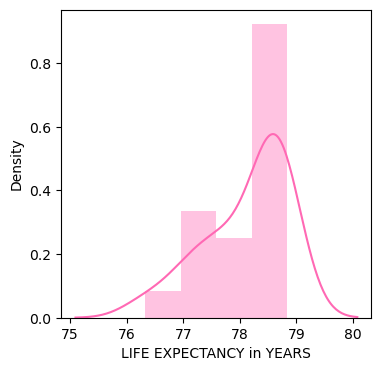

In [8]:
plt.figure(figsize=(4,4))
sns.distplot(data["LIFE EXPECTANCY in YEARS"],color='hotpink')
print("Median",data["LIFE EXPECTANCY in YEARS"].median())

In [9]:
data=data.fillna(data["LIFE EXPECTANCY in YEARS"].median())

In [10]:
data["LIFE EXPECTANCY in YEARS"]

0     77.036585
1     77.487805
2     77.487805
3     77.687805
4     77.987805
5     78.039024
6     78.390244
7     78.541463
8     78.641463
9     78.741463
10    78.741463
11    78.841463
12    78.690244
13    78.539024
14    78.539024
15    78.639024
16    78.787805
17    76.980488
18    76.329268
19    78.539024
Name: LIFE EXPECTANCY in YEARS, dtype: float64

#### Setting Date as Index as it is unique

In [11]:
data=data.set_index("DATE")

#### Analyzing how factors changed over Years

In [12]:
years=[2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]

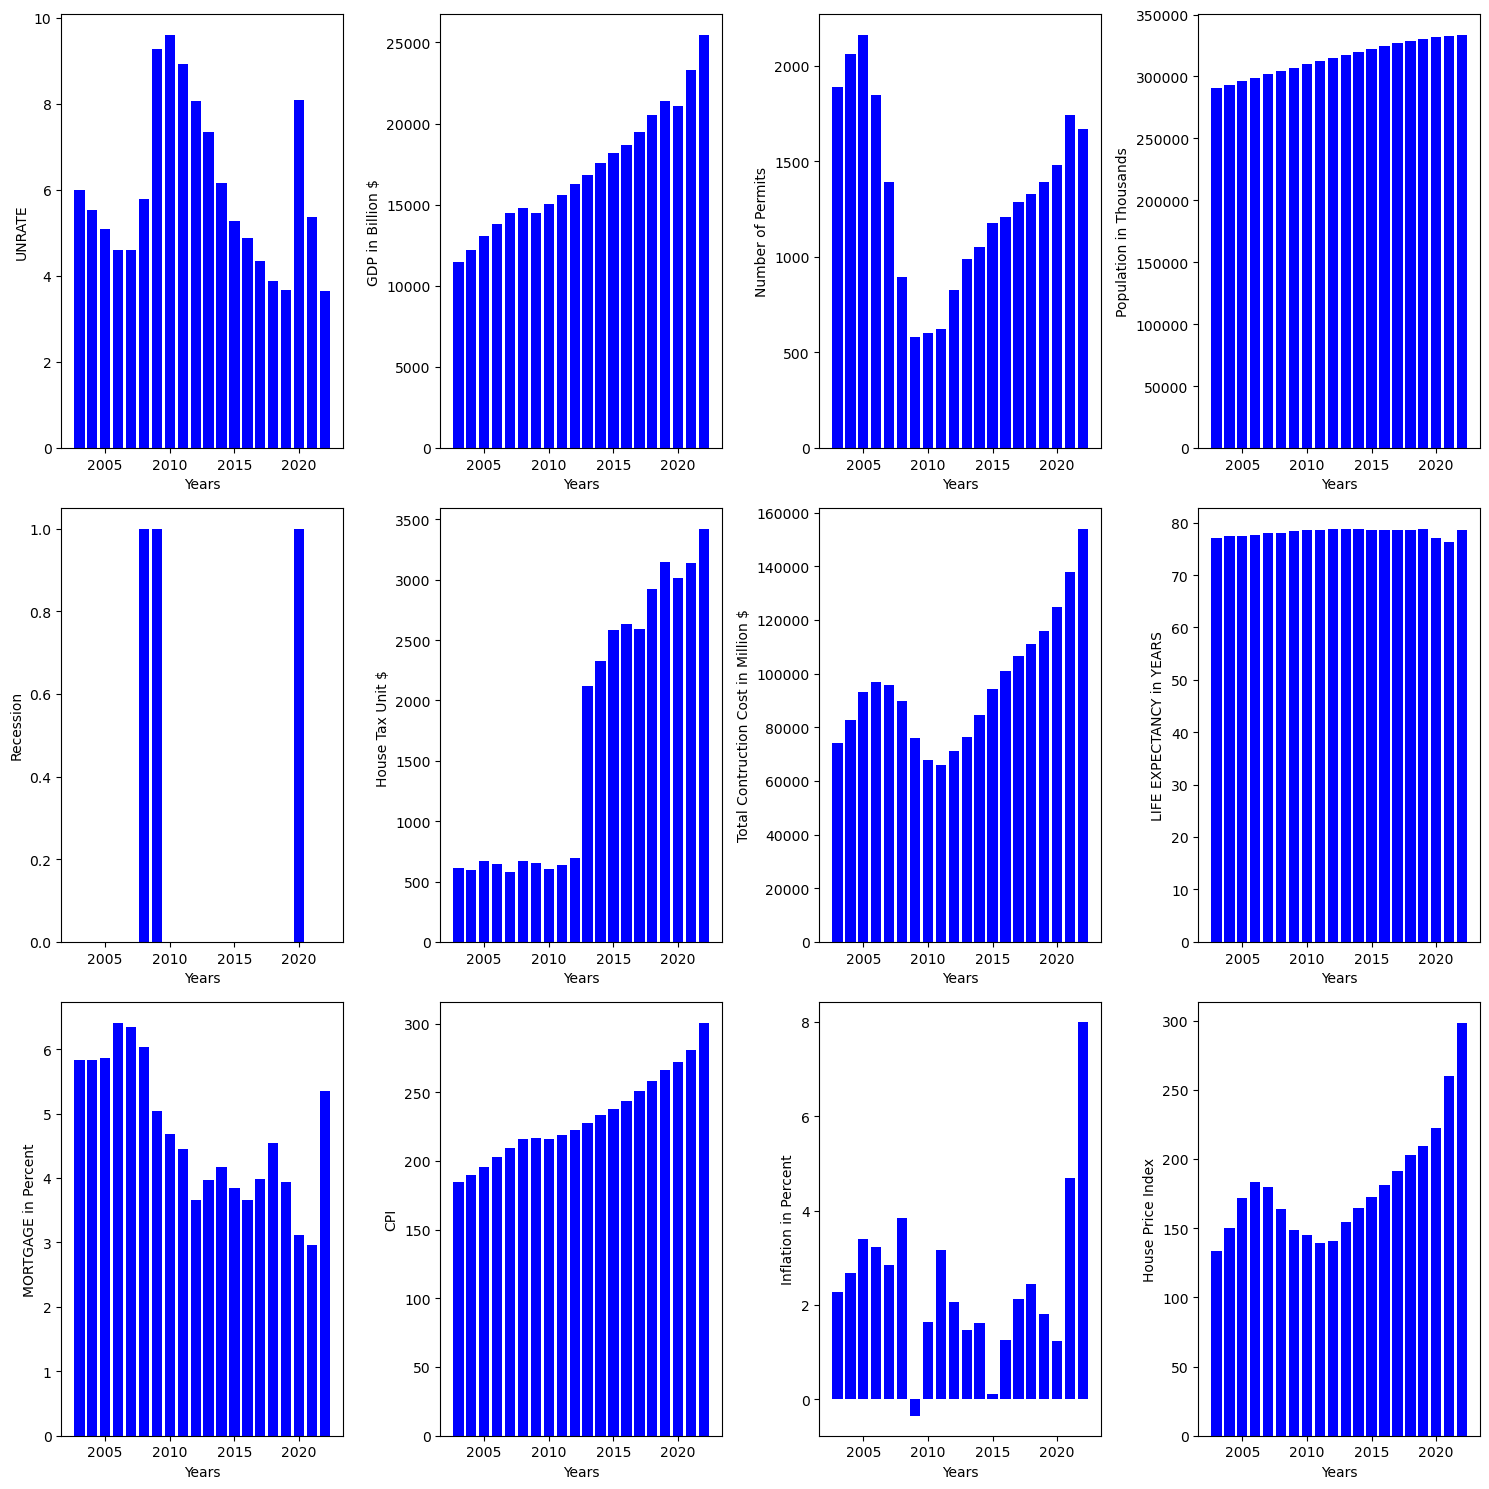

In [13]:
nrows = 3
ncols = 4
repeater = 1
plt.figure(figsize=(15, 15))
plt.xticks(years,rotation=70,fontsize=50)

for i in data.columns:
    plt.subplot(nrows, ncols, repeater)
    plt.bar(years,data.loc[:, i],color='blue')
    plt.xlabel("Years")
    plt.ylabel(str(i))
    repeater = repeater+1
    
plt.tight_layout()
plt.show()

In [14]:
data.columns

Index(['UNRATE', 'GDP in Billion $', 'Number of Permits',
       'Population in Thousands', 'Recession', 'House Tax Unit $ ',
       'Total Contruction Cost in Million $', 'LIFE EXPECTANCY in YEARS',
       'MORTGAGE in Percent', 'CPI', 'Inflation in Percent',
       'House Price Index'],
      dtype='object')

#### Numerical Columns

In [15]:
num_cols=['UNRATE', 'GDP in Billion $', 'Number of Permits',
       'Population in Thousands', 'House Tax Unit $ ',
       'Total Contruction Cost in Million $', 'LIFE EXPECTANCY in YEARS',
       'MORTGAGE in Percent', 'CPI', 'Inflation in Percent']

## Outlier Analysis

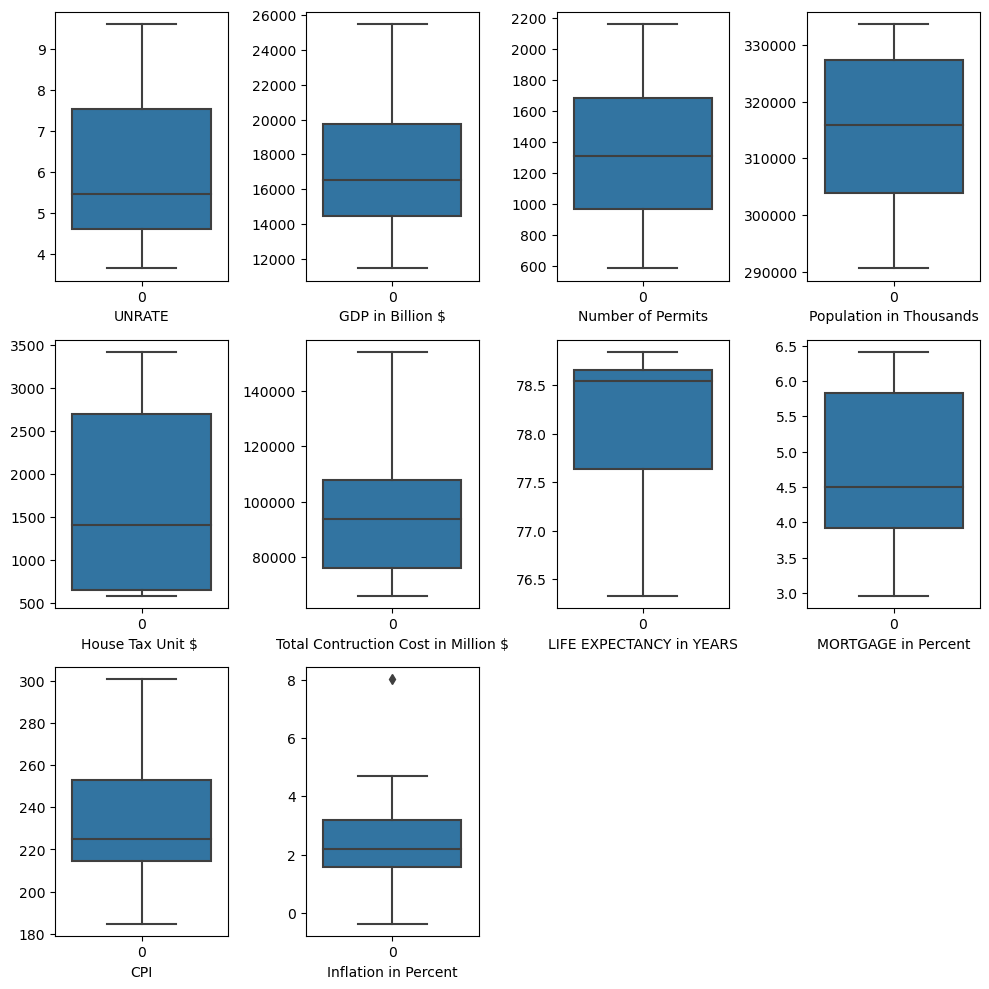

In [16]:
nrows = 3
ncols = 4
repeater = 1
plt.figure(figsize=(10, 10))

for i in num_cols:
    plt.subplot(nrows, ncols, repeater)
    sns.boxplot(data.loc[:, i])
    plt.xlabel(str(i))
    repeater = repeater+1
    
plt.tight_layout()
plt.show()

#### Inflation has some outlier,
#### let's remove them using IQR Method

In [17]:
q1 = data["Inflation in Percent"].quantile(0.25)
q3 = data["Inflation in Percent"].quantile(0.75)
iqr = q3 - q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
data["Inflation in Percent"]=data["Inflation in Percent"][~((data["Inflation in Percent"]>ul)|(data["Inflation in Percent"]<ll))]


#### Filling the NaN value with median which was removed in IQR

In [18]:
data=data.fillna(data["Inflation in Percent"].median())

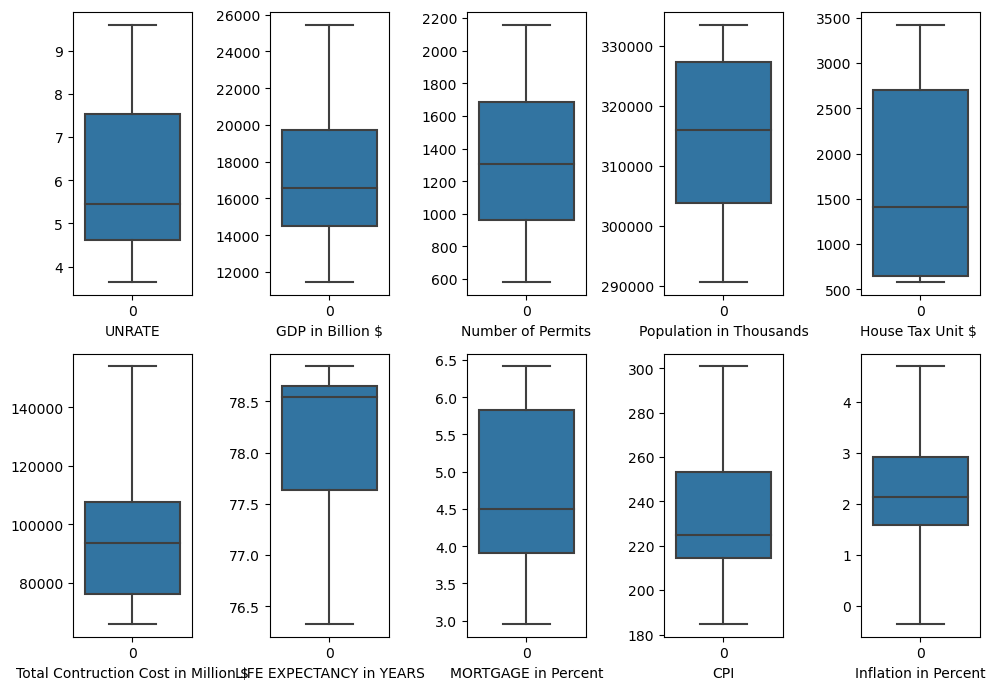

In [19]:
nrows = 3
ncols = 5
repeater = 1
plt.figure(figsize=(10, 10))

for i in num_cols:
    plt.subplot(nrows, ncols, repeater)
    sns.boxplot(data.loc[:, i])
    plt.xlabel(str(i))
    repeater = repeater+1
    
plt.tight_layout()
plt.show()

## Univaritae Analysis

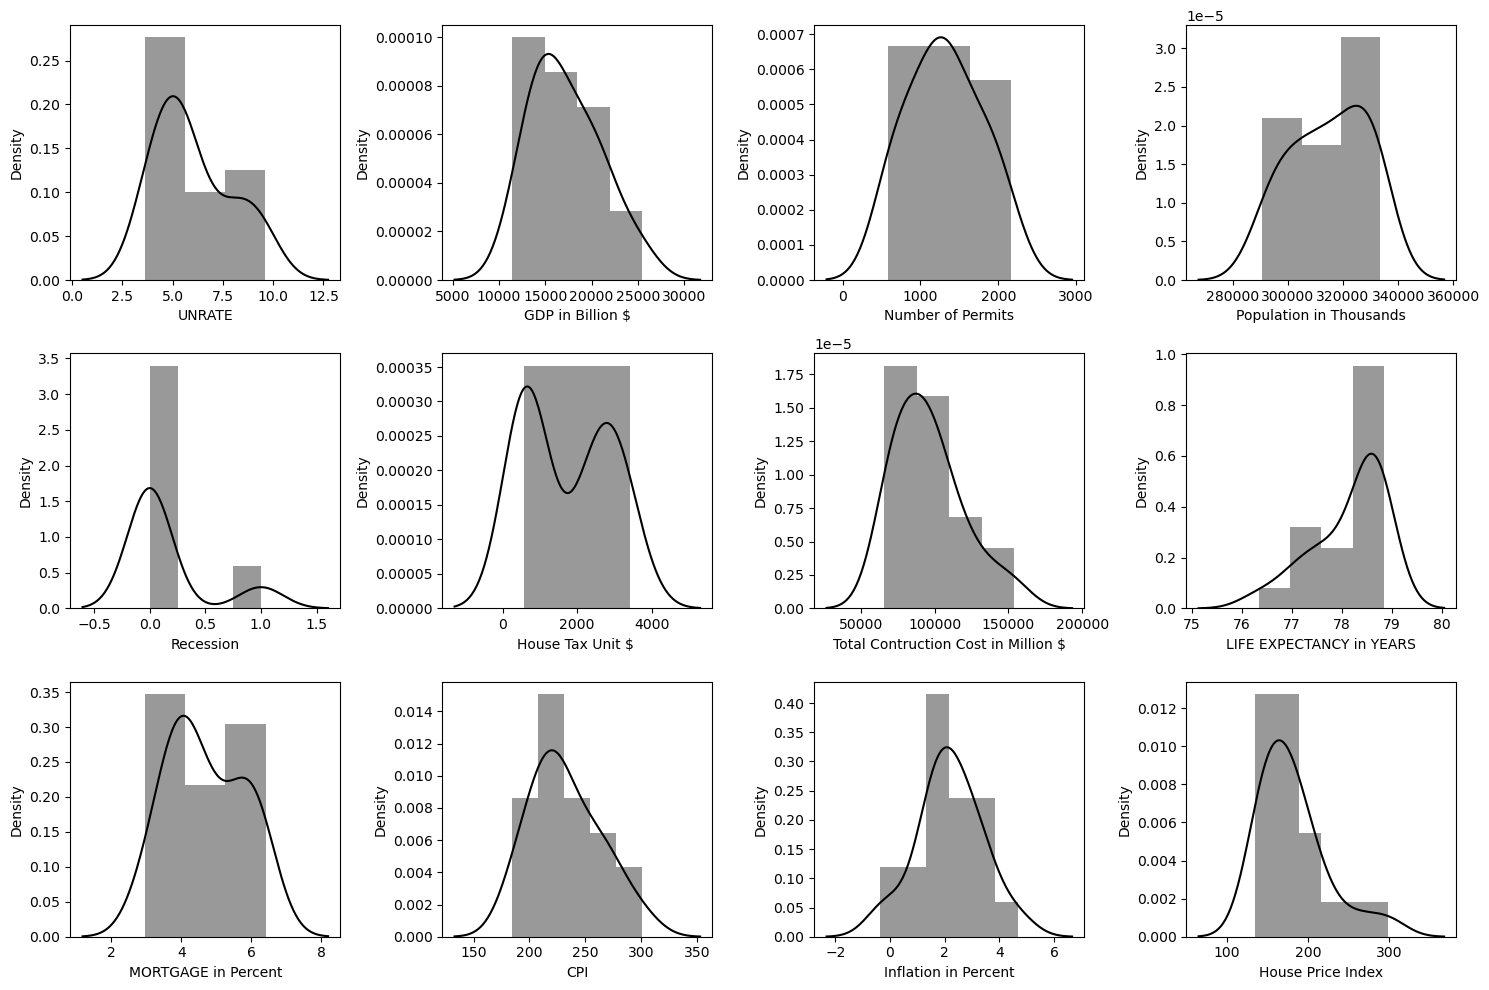

In [20]:
nrows = 3
ncols = 4
repeater = 1
plt.figure(figsize=(15, 10))

for i in data.columns:
    plt.subplot(nrows, ncols, repeater)
    sns.distplot(data.loc[:, i],color='k')
    repeater = repeater+1
    
plt.tight_layout()
plt.show()

#### Inferences
* Data is mostly normal
* House Tax shows bimodal data

## Bivariate Analysis

### Target vs Numeric Variables Scatterplot

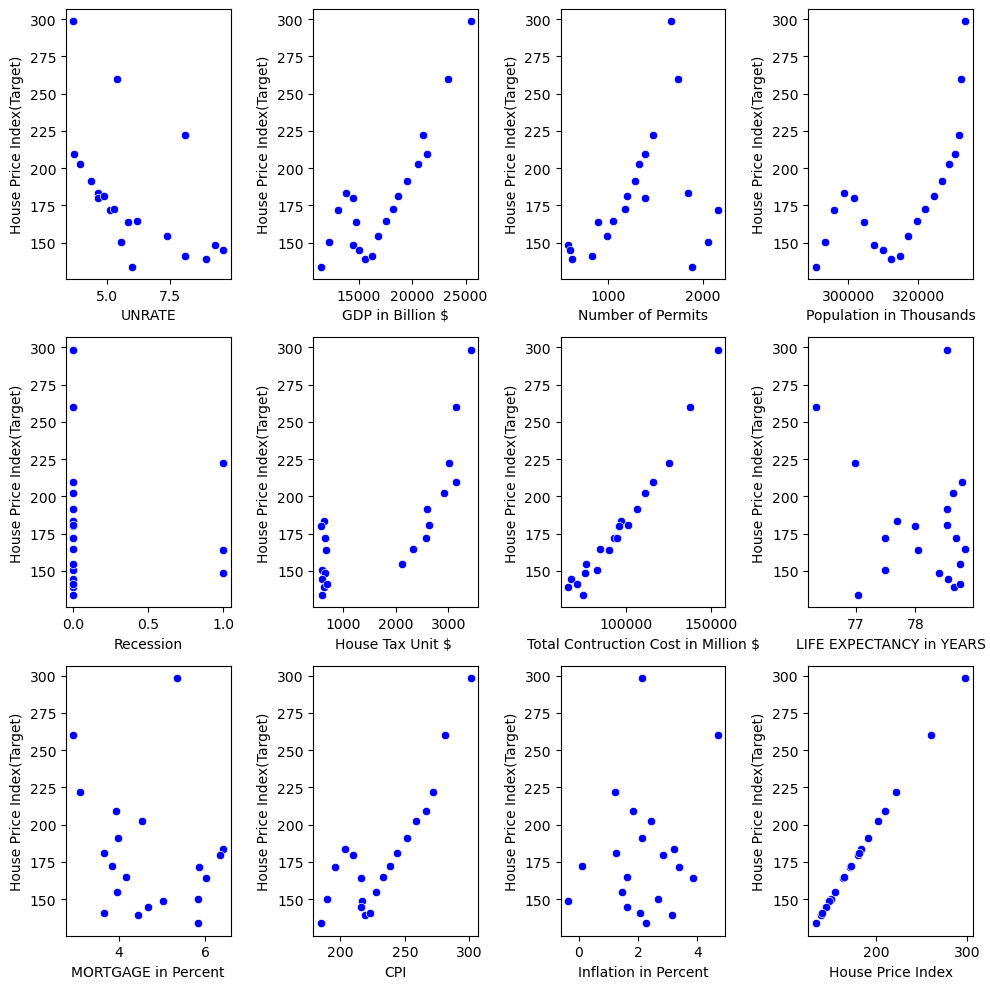

In [21]:
nrows = 3
ncols = 4
repeater = 1
plt.figure(figsize=(10, 10))
#plt.xticks(years,rotation=70,fontsize=50)

for i in data.columns:
    plt.subplot(nrows, ncols, repeater)
    sns.scatterplot(x=data.loc[:, i],y=data["House Price Index"],color='blue')
    plt.xlabel(str(i))
    plt.ylabel("House Price Index(Target)")
    repeater = repeater+1
    
plt.tight_layout()
plt.show()

### Correlation Matrix

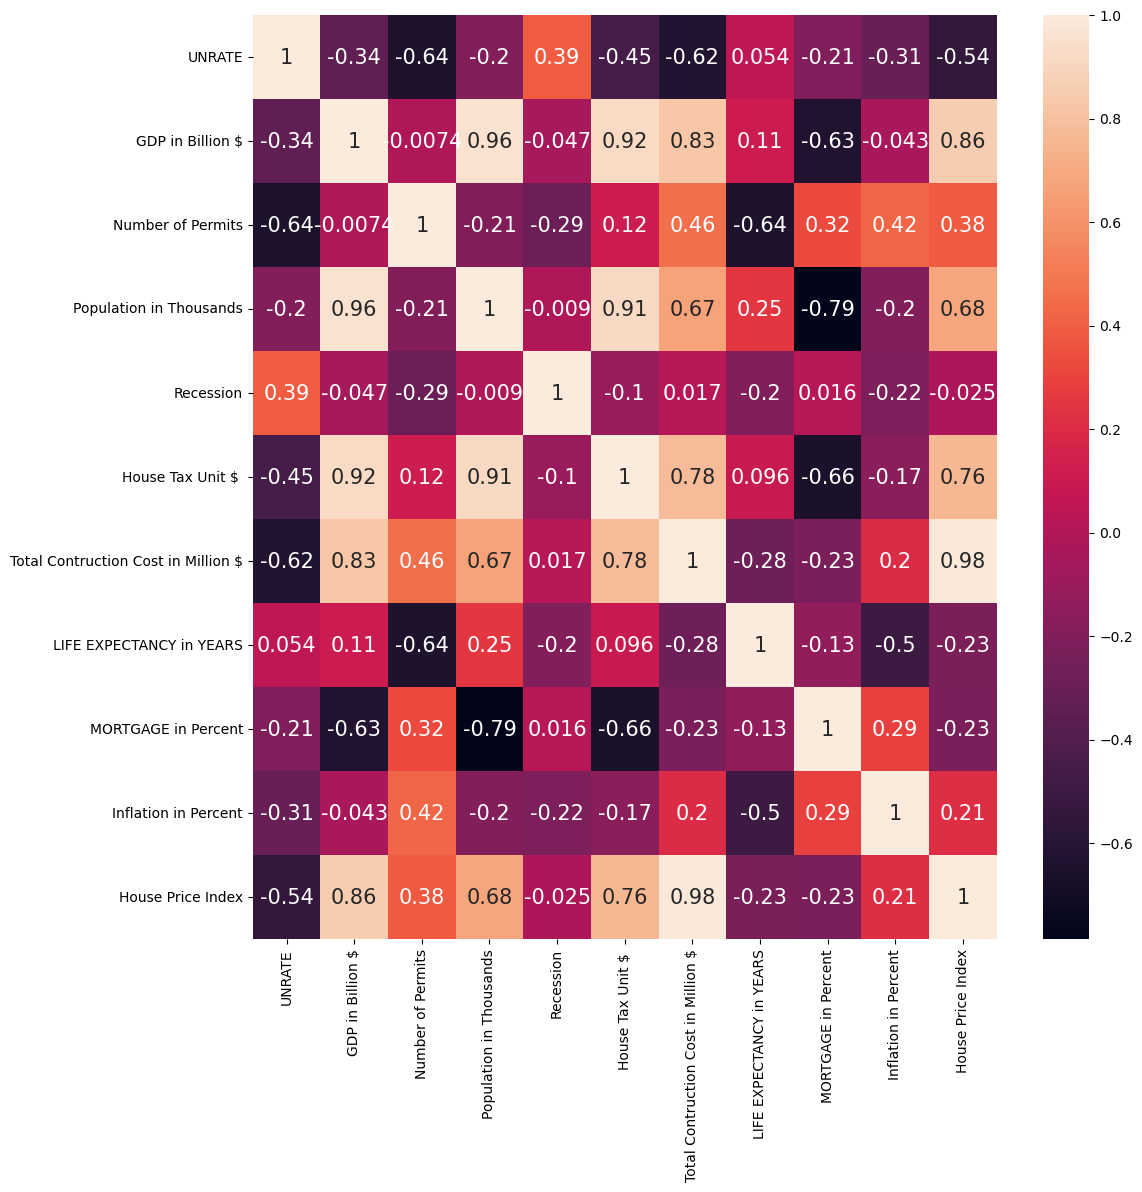

In [22]:
plt.subplots(figsize=(12,12))
sns.heatmap(data.drop("CPI",axis=1).corr(),annot=True,annot_kws={'size':15})
plt.show()

### Multicollinearity Check

In [23]:
vif_data=pd.DataFrame()
vif_data['Features']=data.columns

In [24]:
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]

In [25]:
vif_data.sort_values("VIF",ascending=False)

,Features,VIF
9,CPI,192426.038460
3,Population in Thousands,174991.738215
7,LIFE EXPECTANCY in YEARS,150112.854064
1,GDP in Billion $,70188.533481
6,Total Contruction Cost in Million $,26808.008318
11,House Price Index,16131.558019
0,UNRATE,1133.165761
8,MORTGAGE in Percent,958.517866
2,Number of Permits,369.353091
5,House Tax Unit $,221.251298


#### CPI shows high multicollinearity

### Train-Test Split

In [26]:
Target=data["House Price Index"]
X=data.drop("House Price Index",axis=1)

In [27]:
num_cols=['UNRATE', 'GDP in Billion $', 'Number of Permits',
       'Population in Thousands', 'House Tax Unit $ ',
       'Total Contruction Cost in Million $', 'LIFE EXPECTANCY in YEARS',
       'MORTGAGE in Percent', 'CPI', 'Inflation in Percent']

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,Target,test_size=0.3)

### Standard Scaling

In [29]:
X_num_train=X_train.loc[:,num_cols]

In [30]:
X_num_train_scaled=X_num_train.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

In [32]:
X_num_train=pd.DataFrame(X_num_train_scaled,columns=num_cols)

In [33]:
X_cat_train=X_train["Recession"]

In [34]:
X_train_=pd.concat([X_num_train_scaled,X_cat_train],axis=1)

In [35]:
X_test_num=X_test.loc[:,num_cols]

In [36]:
X_test_cat=X_test["Recession"]

In [37]:
X_test_=pd.concat([X_test_num,X_test_cat],axis=1)

#### Base Model (inear Regression using OLS)   Full Model

In [38]:
X_c=sm.add_constant(X_train)

In [39]:
base_model=sm.OLS(y_train,X_c).fit()

In [40]:
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      House Price Index   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1885.
Date:                Sun, 01 Oct 2023   Prob (F-statistic):           0.000530
Time:                        23:47:18   Log-Likelihood:                -7.0516
No. Observations:                  14   AIC:                             38.10
Df Residuals:                       2   BIC:                             45.77
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                -208.9796    270.198     -0.773      0.520   -1371.547     953.588
UNRATE                                  5.8377      0.812      7.191      0.019       2.345       9.330
GDP in Billion $                        0.0145      0.004      3.300      0.081      -0.004       0.033
Number of Permits                       0.0088      0.007      1.279      0.329      -0.021       0.038
Population in Thousands                 0.0015      0.001      1.944      0.191      -0.002       0.005
Recession                              -0.9790      3.789     -0.258      0.820     -17.282      15.324
House Tax Unit $                       -0.0063      0.003     -1.946      0.191      -0.020       0.008
Total Contruction Cost in Million $     0.0016      0.000      4.888      0.039       0.000       0.003
LIFE EXPECTANCY in YEARS               -2.7103      4.577     -0.592      0.614     -22.405      16.984
MORTGAGE in Percent                    14.5107      4.235      3.426      0.076      -3.713      32.734
CPI                                    -1.5606      0.544     -2.868      0.103      -3.902       0.781
Inflation in Percent                   -1.1893      0.906     -1.312      0.320      -5.089       2.711
==============================================================================
Omnibus:                        1.942   Durbin-Watson:                   1.298
Prob(Omnibus):                  0.379   Jarque-Bera (JB):                0.606
Skew:                          -0.489   Prob(JB):                        0.739
Kurtosis:                       3.288   Cond. No.                     3.10e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Feature Selection

In [41]:
sbs = sfs(LinearRegression(),
         k_features=11,
         forward=False,
         floating=False,
         cv=0)
sbs.fit(X_train, y_train)
sbs.k_feature_names_

('UNRATE',
 'GDP in Billion $',
 'Number of Permits',
 'Population in Thousands',
 'Recession',
 'House Tax Unit $ ',
 'Total Contruction Cost in Million $',
 'LIFE EXPECTANCY in YEARS',
 'MORTGAGE in Percent',
 'CPI',
 'Inflation in Percent')

In [59]:
def mod(model,X_train,X_test,y_train,y_test):
    mod_=model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mse=mean_squared_error(y_test,y_pred)
    print("MSE:",mse)
    print("RMSE:",np.sqrt(mse))

### Model Building using Selected Featured

In [60]:
X_train_=X_train.loc[:,sbs.k_feature_names_]

In [61]:
X_test_=X_test.loc[:,sbs.k_feature_names_]

####  XGBoost Regressor with default parameters

In [62]:
mod(XGBRegressor(n_estimators=250),X_train_,X_test_,y_train,y_test)

MSE: 1982.149209557151
RMSE: 44.521334319145815


#### GradientBoost Regressor with default parameters

In [63]:
mod(GradientBoostingRegressor(),X_train_,X_test_,y_train,y_test)

MSE: 343.3970560566393
RMSE: 18.530975582970242


#### AdaBoost Regressor with deafult parameters

In [64]:
mod(AdaBoostRegressor(),X_train_,X_test_,y_train,y_test)

MSE: 659.6595175098664
RMSE: 25.683837670991974


#### Random Forest Regressor with default parameters

In [65]:
mod(RandomForestRegressor(),X_train_,X_test_,y_train,y_test)

MSE: 270.47345650727783
RMSE: 16.446077237666064


#### Decision Tree Regressor with default parameters

In [66]:
mod(DecisionTreeRegressor(),X_train_,X_test_,y_train,y_test)

MSE: 1919.1864666413223
RMSE: 43.80852047994


#### KNeighbors Regressor using default parameters

In [67]:
mod(KNeighborsRegressor(),X_train_,X_test_,y_train,y_test)

MSE: 524.7360041365915
RMSE: 22.907116888351347


####  CatBoost Regressor with default parameters

In [68]:
mod(CatBoostRegressor(),X_train_,X_test_,y_train,y_test)

Learning rate set to 0.020858
0:	learn: 40.5292709	total: 816us	remaining: 816ms
1:	learn: 40.3040012	total: 1.39ms	remaining: 695ms
2:	learn: 40.0983119	total: 1.71ms	remaining: 568ms
3:	learn: 39.8657559	total: 2.22ms	remaining: 552ms
4:	learn: 39.5969761	total: 2.72ms	remaining: 542ms
5:	learn: 39.3737840	total: 3.28ms	remaining: 544ms
6:	learn: 39.2032406	total: 3.89ms	remaining: 552ms
7:	learn: 38.9938566	total: 4.51ms	remaining: 559ms
8:	learn: 38.7889933	total: 4.94ms	remaining: 544ms
9:	learn: 38.5547052	total: 5.41ms	remaining: 535ms
10:	learn: 38.2934088	total: 6.03ms	remaining: 543ms
11:	learn: 38.0636165	total: 6.78ms	remaining: 559ms
12:	learn: 37.8150850	total: 7.55ms	remaining: 573ms
13:	learn: 37.6131970	total: 8.1ms	remaining: 570ms
14:	learn: 37.3971351	total: 8.75ms	remaining: 574ms
15:	learn: 37.1692733	total: 9.35ms	remaining: 575ms
16:	learn: 36.9904809	total: 9.94ms	remaining: 575ms
17:	learn: 36.7862156	total: 10.5ms	remaining: 571ms
18:	learn: 36.5768190	total:

217:	learn: 12.6963684	total: 165ms	remaining: 592ms
218:	learn: 12.6248134	total: 167ms	remaining: 594ms
219:	learn: 12.5595569	total: 168ms	remaining: 594ms
220:	learn: 12.4898993	total: 169ms	remaining: 595ms
221:	learn: 12.4186882	total: 170ms	remaining: 595ms
222:	learn: 12.3675287	total: 170ms	remaining: 593ms
223:	learn: 12.2972838	total: 171ms	remaining: 593ms
224:	learn: 12.2384135	total: 172ms	remaining: 592ms
225:	learn: 12.1756047	total: 173ms	remaining: 592ms
226:	learn: 12.1184940	total: 174ms	remaining: 591ms
227:	learn: 12.0558725	total: 174ms	remaining: 590ms
228:	learn: 11.9931881	total: 175ms	remaining: 589ms
229:	learn: 11.9307056	total: 176ms	remaining: 588ms
230:	learn: 11.8678149	total: 176ms	remaining: 587ms
231:	learn: 11.8011460	total: 177ms	remaining: 586ms
232:	learn: 11.7353080	total: 178ms	remaining: 585ms
233:	learn: 11.6779578	total: 178ms	remaining: 584ms
234:	learn: 11.6157780	total: 179ms	remaining: 583ms
235:	learn: 11.5579562	total: 180ms	remaining:

425:	learn: 4.3897069	total: 327ms	remaining: 440ms
426:	learn: 4.3653932	total: 328ms	remaining: 440ms
427:	learn: 4.3447258	total: 328ms	remaining: 439ms
428:	learn: 4.3214007	total: 329ms	remaining: 438ms
429:	learn: 4.2982048	total: 330ms	remaining: 438ms
430:	learn: 4.2751404	total: 331ms	remaining: 437ms
431:	learn: 4.2528527	total: 332ms	remaining: 437ms
432:	learn: 4.2298140	total: 333ms	remaining: 436ms
433:	learn: 4.2076715	total: 334ms	remaining: 436ms
434:	learn: 4.1857378	total: 335ms	remaining: 435ms
435:	learn: 4.1639206	total: 335ms	remaining: 434ms
436:	learn: 4.1422194	total: 336ms	remaining: 433ms
437:	learn: 4.1199960	total: 337ms	remaining: 432ms
438:	learn: 4.0978986	total: 337ms	remaining: 431ms
439:	learn: 4.0764482	total: 338ms	remaining: 430ms
440:	learn: 4.0551143	total: 339ms	remaining: 429ms
441:	learn: 4.0331517	total: 339ms	remaining: 428ms
442:	learn: 4.0113157	total: 340ms	remaining: 427ms
443:	learn: 3.9923041	total: 341ms	remaining: 426ms
444:	learn: 

668:	learn: 1.2169175	total: 495ms	remaining: 245ms
669:	learn: 1.2111283	total: 496ms	remaining: 244ms
670:	learn: 1.2043817	total: 497ms	remaining: 244ms
671:	learn: 1.1986548	total: 498ms	remaining: 243ms
672:	learn: 1.1919786	total: 499ms	remaining: 243ms
673:	learn: 1.1863134	total: 500ms	remaining: 242ms
674:	learn: 1.1797068	total: 501ms	remaining: 241ms
675:	learn: 1.1741027	total: 502ms	remaining: 241ms
676:	learn: 1.1675650	total: 503ms	remaining: 240ms
677:	learn: 1.1610673	total: 503ms	remaining: 239ms
678:	learn: 1.1555518	total: 504ms	remaining: 238ms
679:	learn: 1.1491219	total: 505ms	remaining: 238ms
680:	learn: 1.1436659	total: 506ms	remaining: 237ms
681:	learn: 1.1373031	total: 506ms	remaining: 236ms
682:	learn: 1.1319059	total: 507ms	remaining: 235ms
683:	learn: 1.1256095	total: 508ms	remaining: 235ms
684:	learn: 1.1193516	total: 509ms	remaining: 234ms
685:	learn: 1.1140398	total: 509ms	remaining: 233ms
686:	learn: 1.1078472	total: 510ms	remaining: 232ms
687:	learn: 

881:	learn: 0.4039578	total: 661ms	remaining: 88.4ms
882:	learn: 0.4018530	total: 662ms	remaining: 87.7ms
883:	learn: 0.3997592	total: 663ms	remaining: 86.9ms
884:	learn: 0.3976764	total: 664ms	remaining: 86.2ms
885:	learn: 0.3956045	total: 664ms	remaining: 85.5ms
886:	learn: 0.3935435	total: 665ms	remaining: 84.8ms
887:	learn: 0.3916970	total: 666ms	remaining: 84ms
888:	learn: 0.3896564	total: 667ms	remaining: 83.3ms
889:	learn: 0.3876264	total: 668ms	remaining: 82.5ms
890:	learn: 0.3856071	total: 668ms	remaining: 81.8ms
891:	learn: 0.3835983	total: 669ms	remaining: 81ms
892:	learn: 0.3816001	total: 670ms	remaining: 80.3ms
893:	learn: 0.3796123	total: 671ms	remaining: 79.5ms
894:	learn: 0.3776349	total: 671ms	remaining: 78.7ms
895:	learn: 0.3756678	total: 672ms	remaining: 78ms
896:	learn: 0.3737111	total: 673ms	remaining: 77.2ms
897:	learn: 0.3717646	total: 673ms	remaining: 76.5ms
898:	learn: 0.3698283	total: 674ms	remaining: 75.7ms
899:	learn: 0.3679022	total: 675ms	remaining: 75ms
9

### SO RandomForest gives best results with lowest RMSE

In [69]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RandomForestRegressor(), X_num_train_scaled, y_train, cv=5, scoring='r2')
print("Cross-validated scores:", scores )
print("Average score:" , np.average(scores))

Cross-validated scores: [  0.1308978    0.34044295   0.67923648   0.90134712 -10.47519957]
Average score: -1.6846550430723215


In [ ]:
RandomForestRegressor()

In [76]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth':[None,4,6,9]
}

In [77]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, scoring='r2')

In [78]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 6, 9],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='r2')

In [79]:
grid_search.best_params_

{'max_depth': 9, 'n_estimators': 200}

In [80]:
mod(RandomForestRegressor(max_depth=9,n_estimators=200),X_train_,X_test_,y_train,y_test)

MSE: 554.9776385606505
RMSE: 23.557963378879986


In [81]:
#Best RMSE is given by Random Forest with deafult parameters

### Final Model (RandomForest)

* RMSE :16.44

### Model Interpretation

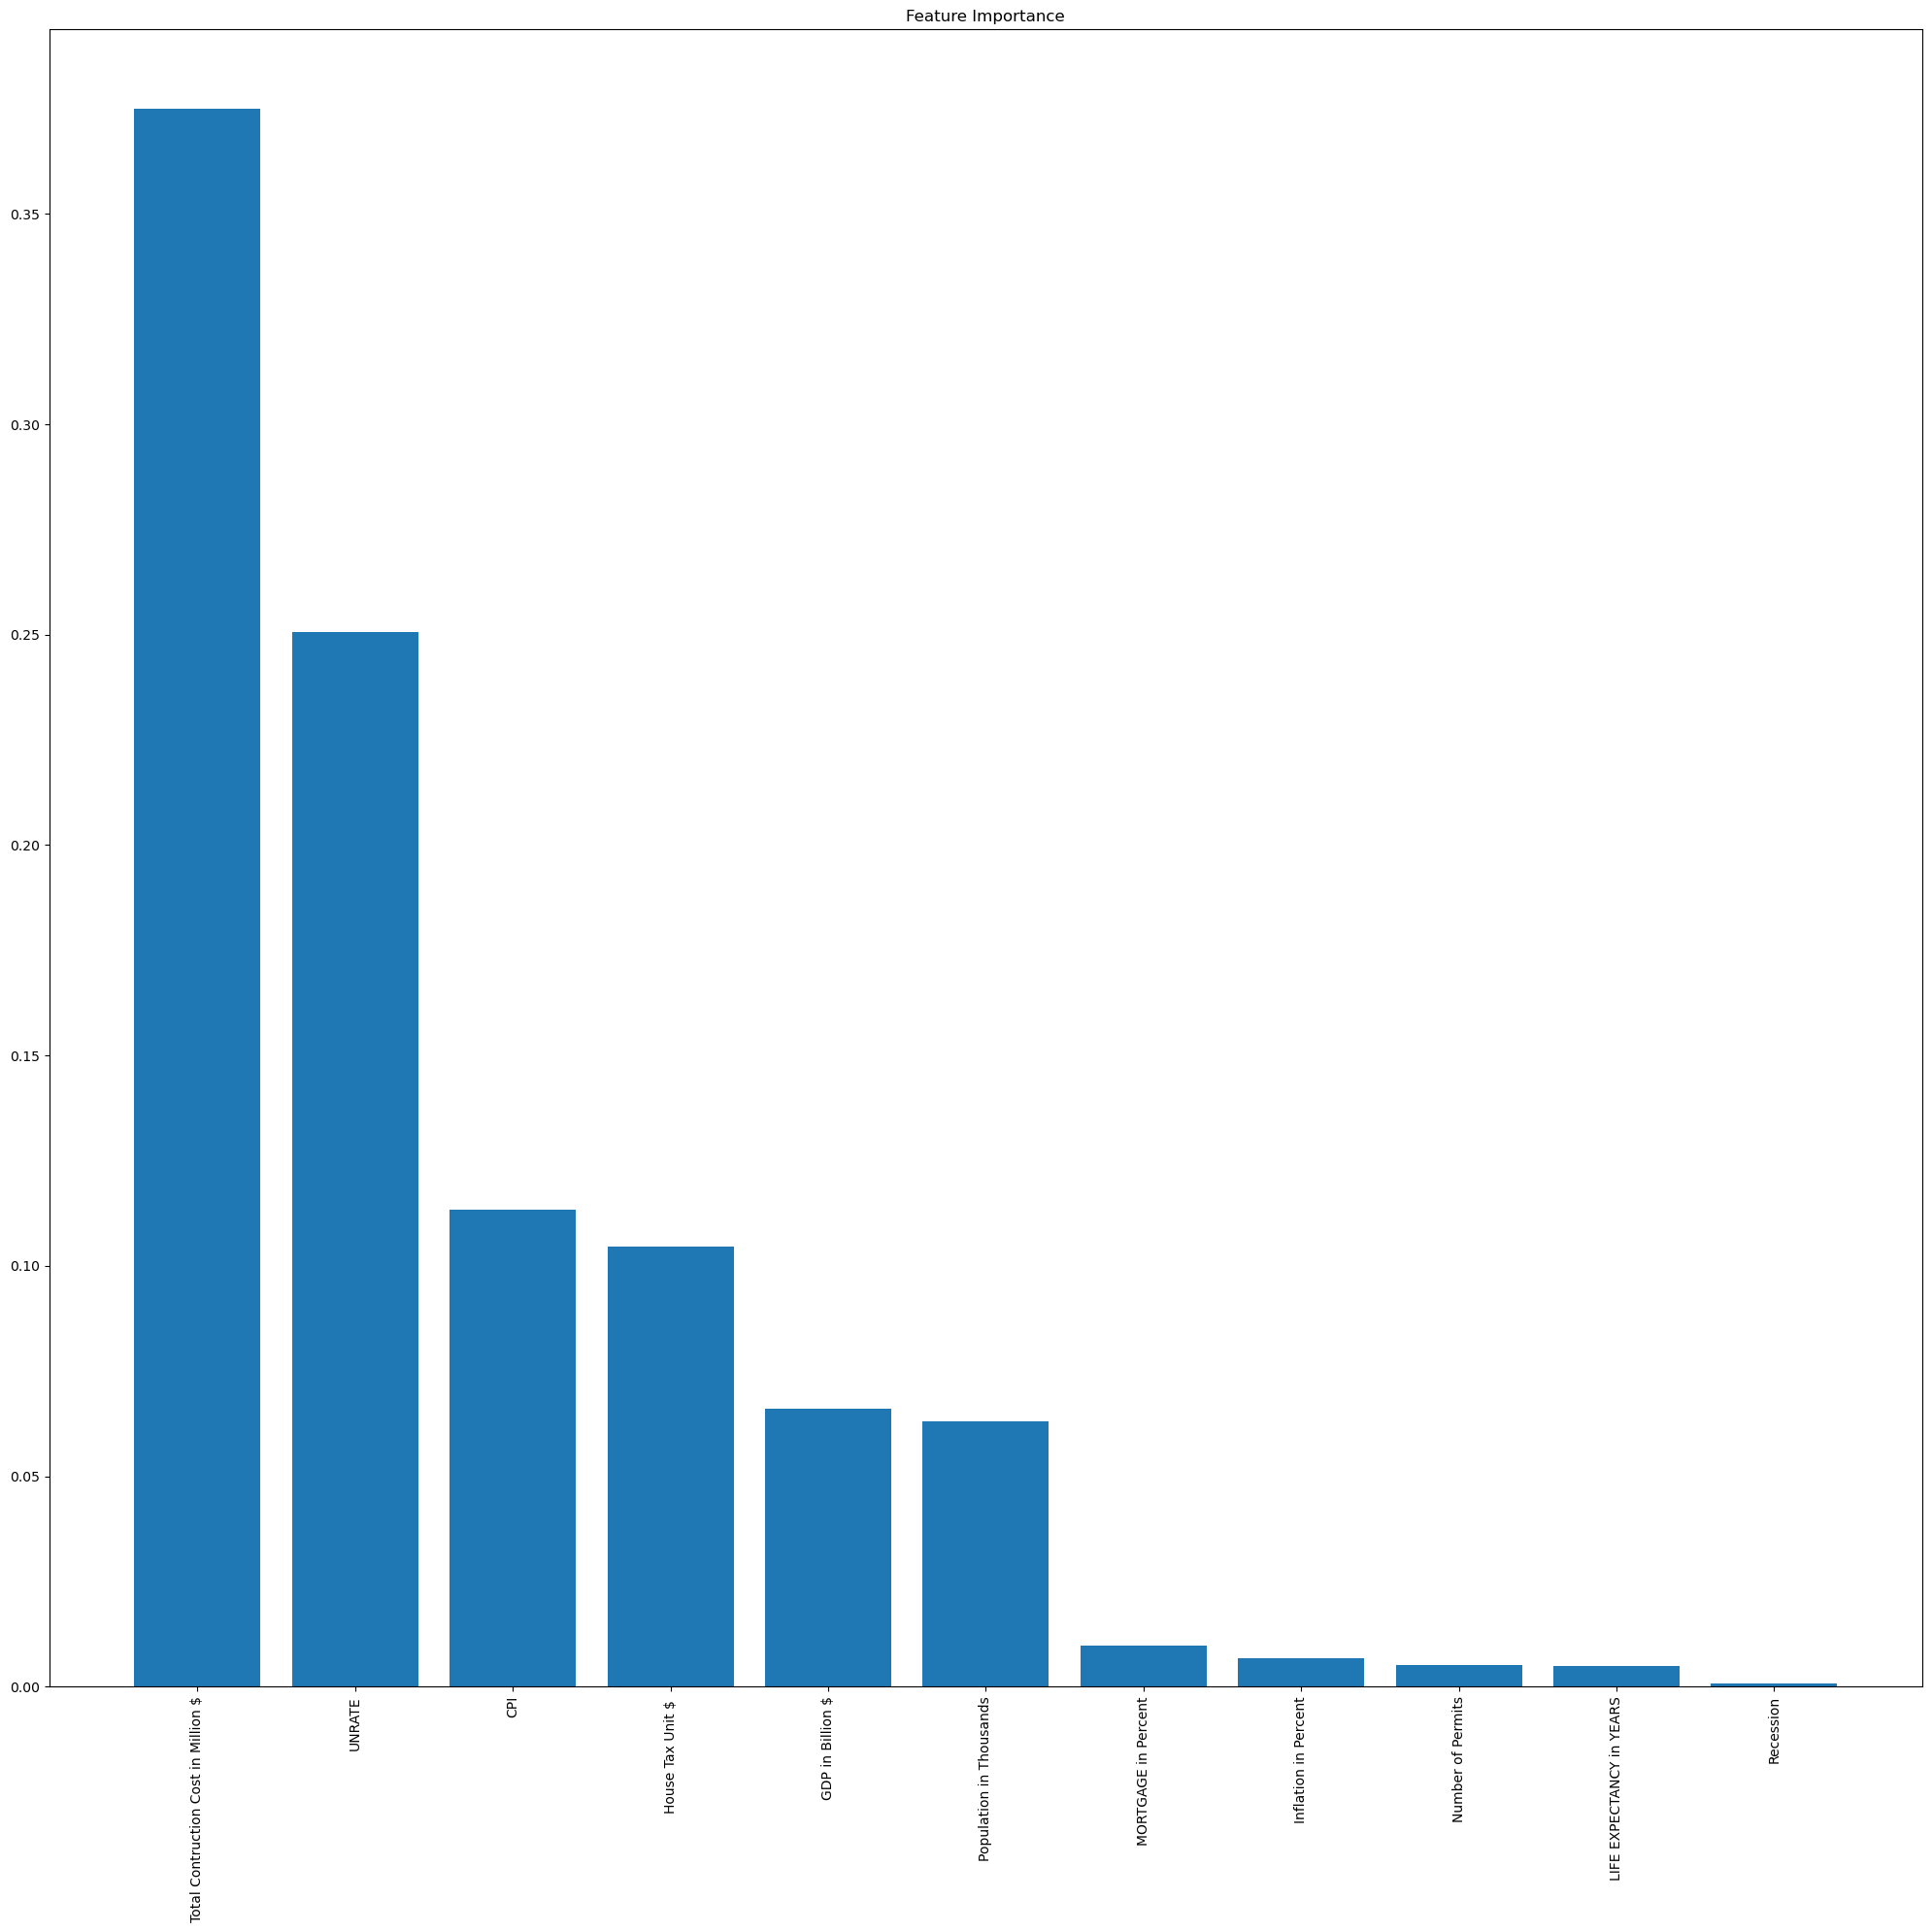

In [92]:
model = RandomForestRegressor()

model.fit(X_train_, y_train)
importances = model.feature_importances_

#
sorted_indices = np.argsort(importances)[::-1]

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train_.shape[1]), X_train_.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

* Construction cost ,Unemployment Rate,CPI affects the House Price Index and buying patterns the most
* Recession, Life Expectancy and Permits have not affected much